In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic') #한글 깨짐 방지 
plt.rcParams['axes.unicode_minus'] = False #한글 깨짐 방지 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


# 📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!



### 예상: 연령대별 허리둘레에 차이가 있을 것이다. 

In [3]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [4]:
df['연령대']  = df['연령대코드(5세단위)'].map(age_code)
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,40~44세
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,40~44세
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,55~59세
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,50~54세


In [5]:
df.groupby(['연령대'])['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


<AxesSubplot:ylabel='연령대'>

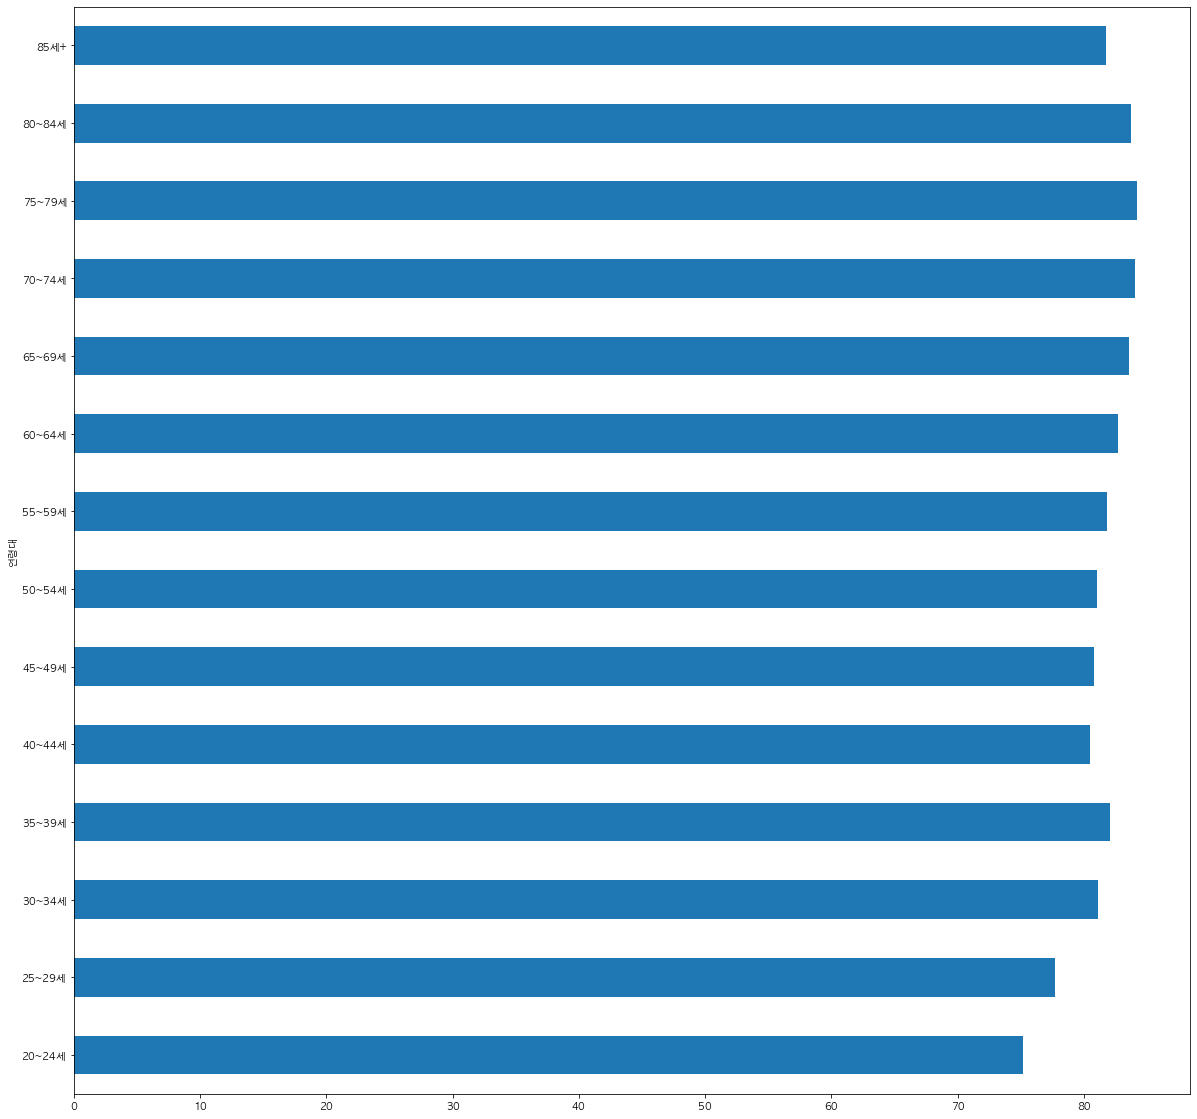

In [18]:
plt.figure(figsize = (20,20))
df.groupby(['연령대'])['허리둘레'].mean().plot.barh()

#### 결론: 연령대 별 허리둘레는 차이가 없었다. 개인적인 견해로는 이미 성장을 마친 20대 이상부터 집계한 데이터라 허리둘레에는 20대부터 80대까지는 허리둘레의 차이가 없는 것 같다.

# 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [6]:
columns = ['음주여부','흡연상태','연령대코드(5세단위)','성별코드']
columns 
#columns에 상관계수에 사용할 컬럼들 담기

['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

In [7]:
df_small = df[columns]
df_corr = df_small.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


In [8]:
df_corr['음주여부'].sort_values()

성별코드          -0.368630
연령대코드(5세단위)   -0.283296
흡연상태           0.352014
음주여부           1.000000
Name: 음주여부, dtype: float64

<AxesSubplot:>

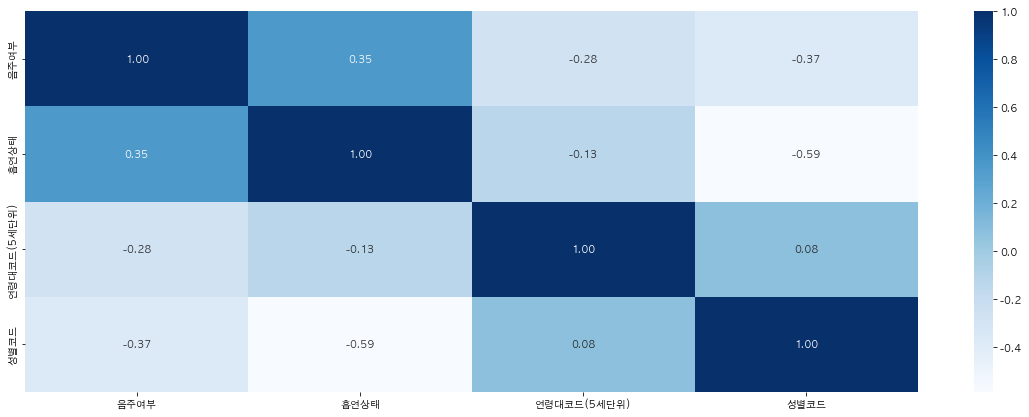

In [9]:
plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'Blues')

/var/folders/0r/x23_t6lx0fd0nfysw2tksxxh0000gn/T/ipykernel_53294/137277565.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<AxesSubplot:>

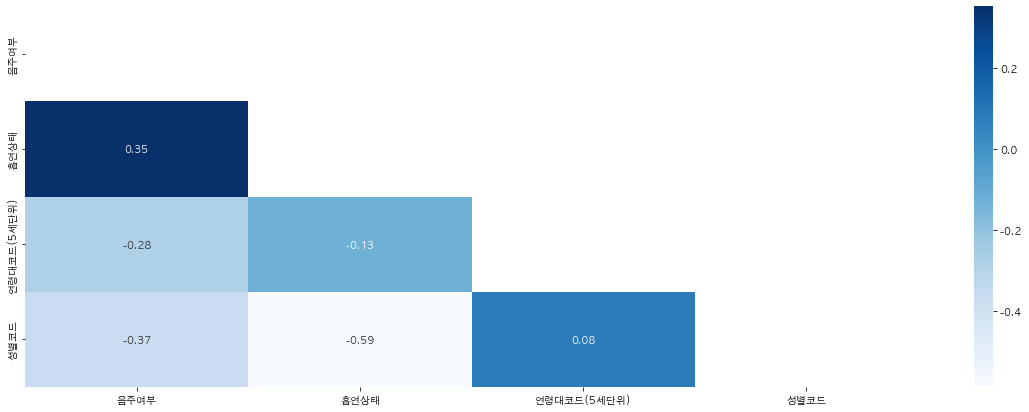

In [10]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

# 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

## 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [11]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [12]:
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,40~44세
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,40~44세
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,55~59세
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,50~54세


In [20]:
df["흡연"] = df['흡연상태'].replace(smoke)
df["음주"] = df['음주여부'].replace(drink)
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연안함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세,흡연안함,안마심
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세,흡연안함,마심
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연중,안마심
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,40~44세,흡연안함,마심
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,40~44세,흡연안함,안마심
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,1,NaN,NaN,NaN,NaN,0.0,20181126,55~59세,흡연안함,안마심
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,50~54세,끊음,마심


In [25]:
# 크로스탭 기능으로 음주, 흡연 여부에 따른 count
df_smoke_drink = pd.crosstab(index=df.음주, columns=df.흡연)
df_smoke_drink

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


In [34]:
#흡연하는 사람들의 수:
print(df_smoke_drink['흡연중'].sum())
#음주를 하는 사람들의 수: 
print(df_smoke_drink.loc['마심'].sum())
#음주를 하며 흡연을 하는 사람들의 수:
print(df_smoke_drink.loc['마심','흡연중'].sum())

215011
496688
162166


<AxesSubplot:xlabel='흡연', ylabel='count'>

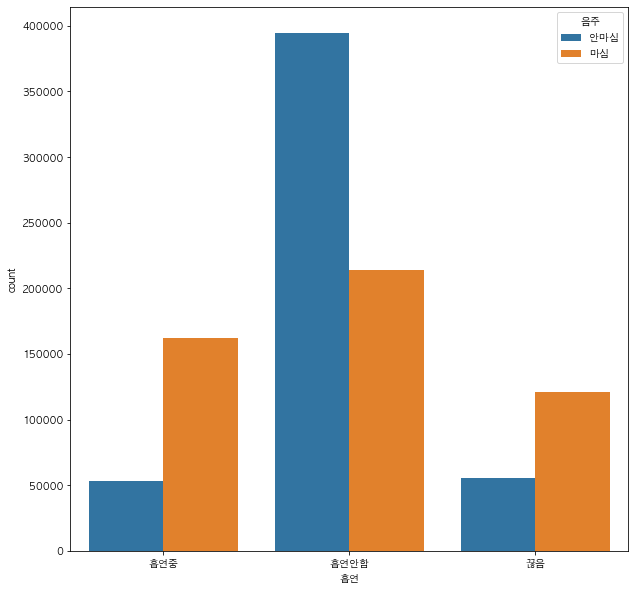

In [37]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = '흡연', hue = '음주')

### 결론: 흡연을 안하는 경우에는 음주 또한 안하는 사람들이 많음. 다만, 흡연중이라면, 음주를 하는 경우가 많았다. 

# 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

## 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.


In [38]:
df #데이터 확인

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연안함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세,흡연안함,안마심
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세,흡연안함,마심
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연중,안마심
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,40~44세,흡연안함,마심
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,40~44세,흡연안함,안마심
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,1,NaN,NaN,NaN,NaN,0.0,20181126,55~59세,흡연안함,안마심
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,50~54세,끊음,마심


In [39]:
ow = df[df['체중(5Kg 단위)'] >= 120] #조건부 데이터 변수에 저장 
ow

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
1219,2017,1220,2,6,41,170.0,120.0,116.0,0.7,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,25~29세,흡연중,안마심
2309,2017,2310,1,6,30,190.0,155.0,127.0,0.8,0.9,...,1,NaN,NaN,NaN,NaN,1.0,20181126,25~29세,흡연중,안마심
3497,2017,3498,1,7,46,175.0,120.0,119.0,1.2,1.2,...,0,NaN,NaN,NaN,NaN,NaN,20181126,30~34세,흡연중,마심
3685,2017,3686,1,7,30,180.0,140.0,127.0,1.5,1.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,30~34세,끊음,안마심
5788,2017,5789,1,8,41,175.0,140.0,124.0,1.0,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연안함,안마심
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996544,2017,996545,1,8,41,175.0,125.0,121.0,1.2,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연중,마심
996828,2017,996829,1,6,47,180.0,120.0,109.0,1.5,1.5,...,1,NaN,NaN,NaN,NaN,1.0,20181126,25~29세,흡연중,마심
997152,2017,997153,1,5,47,180.0,120.0,115.0,0.7,0.8,...,0,NaN,NaN,NaN,NaN,NaN,20181126,20~24세,흡연안함,안마심
997414,2017,997415,1,7,46,170.0,135.0,129.0,1.0,1.2,...,0,NaN,NaN,NaN,NaN,NaN,20181126,30~34세,흡연중,안마심


<Figure size 1800x1080 with 0 Axes>

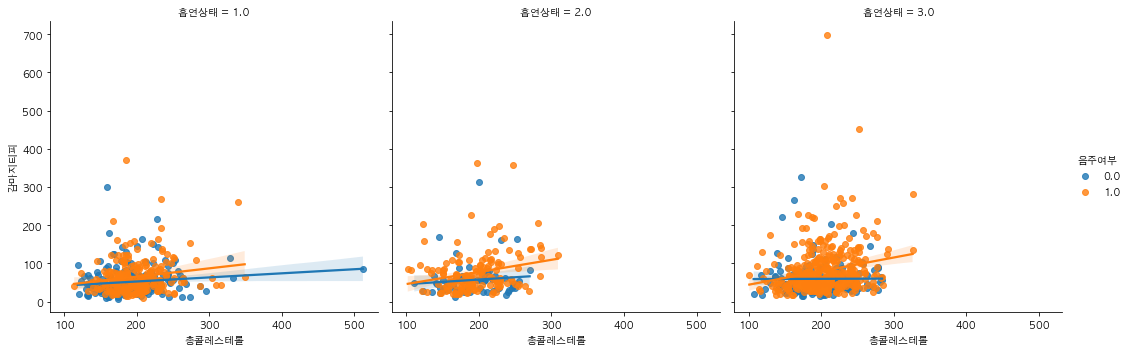

In [40]:
plt.figure(figsize = (25,15))
sns.lmplot(data = ow, x = '총콜레스테롤', y = '감마지티피', hue = '음주여부',col = '흡연상태')

# 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

## 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

## 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

## 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

## 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [41]:
df.groupby('연령대')[['시력(좌)','시력(우)']].describe()

시력(좌)                                                  시력(우)  \
           count      mean       std  min  25%  50%  75%  max     count   
연령대                                                                       
20~24세   23248.0  1.040240  0.432623  0.1  0.8  1.0  1.2  9.9   23248.0   
25~29세   64946.0  1.071170  0.404060  0.1  0.9  1.0  1.2  9.9   64947.0   
30~34세   77657.0  1.090945  0.415954  0.1  0.9  1.0  1.2  9.9   77656.0   
35~39세   84682.0  1.118505  0.403237  0.1  0.9  1.2  1.5  9.9   84682.0   
40~44세  130914.0  1.088649  0.479400  0.1  0.9  1.0  1.2  9.9  130916.0   
45~49세  118342.0  1.022048  0.478540  0.1  0.8  1.0  1.2  9.9  118345.0   
50~54세  129813.0  0.974144  0.507735  0.1  0.8  1.0  1.2  9.9  129812.0   
55~59세  112165.0  0.937509  0.592787  0.1  0.7  0.9  1.0  9.9  112167.0   
60~64세  106474.0  0.869004  0.639883  0.1  0.7  0.8  1.0  9.9  106476.0   
65~69세   53616.0  0.818504  0.791049  0.1  0.6  0.8  1.0  9.9   53612.0   
70~74세   51569.0  0.781303  0.952392  0.1  0.5  0.7  0.9  9.9   51570.0   
75~79세   25969.0  0.728908  1.040766  0.1  0.4  0.6  0.8  9.9   25972.0   
80~84세   16198.0  0.712946  1.217327  0.1  0.4  0.5  0.7  9.9   16199.0   
85세+      4119.0  0.768269  1.706015  0.1  0.3  0.4  0.7  9.9    4119.0   

                                                     
            mean       std  min  25%  50%  75%  max  
연령대                                                  
20~24세  1.032971  0.437217  0.1  0.8  1.0  1.2  9.9  
25~29세  1.062491  0.397540  0.1  0.9  1.0  1.2  9.9  
30~34세  1.085880  0.422703  0.1  0.9  1.0  1.2  9.9  
35~39세  1.115318  0.410767  0.1  0.9  1.2  1.2  9.9  
40~44세  1.084162  0.470881  0.1  0.9  1.0  1.2  9.9  
45~49세  1.019474  0.479541  0.1  0.8  1.0  1.2  9.9  
50~54세  0.970846  0.495946  0.1  0.8  1.0  1.2  9.9  
55~59세  0.935303  0.573512  0.1  0.7  0.9  1.0  9.9  
60~64세  0.873810  0.661162  0.1  0.7  0.8  1.0  9.9  
65~69세  0.814252  0.770082  0.1  0.6  0.8  1.0  9.9  
70~74세  0.776624  0.911729  0.1  0.5  0.7  0.9  9.9  
75~79세  0.736905  1.060750  0.1  0.4  0.6  0.8  9.9  
80~84세  0.718964  1.217422  0.1  0.4  0.6  0.8  9.9  
85세+    0.764992  1.675157  0.1  0.3  0.5  0.7  9.9

In [42]:
df['시력(좌)'].describe() #시력 데이터 확인

count    999712.000000
mean          0.978897
std           0.610948
min           0.100000
25%           0.700000
50%           1.000000
75%           1.200000
max           9.900000
Name: 시력(좌), dtype: float64

In [43]:
df['시력(좌)'].isnull().sum() #결측치 확인 

288

In [44]:
df_eye = df[df['시력(좌)'].notnull()] #시력(좌)의 결측치를 제외한 데이터 df_eye에 저장. 
df_eye

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연안함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세,흡연안함,안마심
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세,흡연안함,마심
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연중,안마심
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,40~44세,흡연안함,마심
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,40~44세,흡연안함,안마심
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,1,NaN,NaN,NaN,NaN,0.0,20181126,55~59세,흡연안함,안마심
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,50~54세,끊음,마심


In [45]:
df['시력(좌)'].dropna(how = 'any', inplace = True)
df['시력(좌)'].isnull().sum()

288

In [46]:
df[df['시력(좌)'].isnull()]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
1451,2017,1452,2,17,26,145.0,45.0,90.0,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,20181126,80~84세,흡연안함,안마심
17066,2017,17067,2,17,11,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,20181126,80~84세,흡연안함,안마심
19091,2017,19092,2,9,43,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,1.0,20181126,40~44세,흡연중,안마심
22281,2017,22282,2,18,47,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,20181126,85세+,흡연안함,안마심
32213,2017,32214,2,18,47,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,20181126,85세+,흡연안함,안마심
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982955,2017,982956,1,11,30,165.0,55.0,74.0,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,20181126,50~54세,흡연중,마심
983651,2017,983652,2,18,43,145.0,20.0,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,20181126,85세+,흡연안함,안마심
992594,2017,992595,2,16,44,150.0,55.0,89.5,NaN,NaN,...,1,NaN,NaN,NaN,NaN,1.0,20181126,75~79세,흡연안함,안마심
993119,2017,993120,2,9,48,155.0,50.0,69.0,NaN,0.1,...,1,NaN,NaN,NaN,NaN,1.0,20181126,40~44세,흡연안함,안마심


<AxesSubplot:ylabel='연령대'>

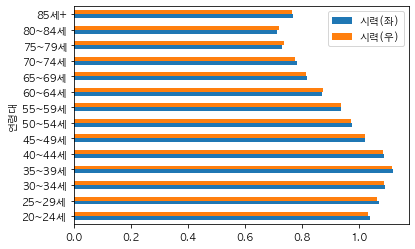

In [47]:
df.groupby('연령대')[['시력(좌)','시력(우)']].mean().plot.barh()

## 가설1 : 성별과 허리둘레의 차이가 있을까? 

In [48]:
hypo1 = df[['성별코드','허리둘레']]
hypo1

,성별코드,허리둘레
0,1,91.0
1,2,73.4
2,1,94.0
3,2,67.5
4,1,93.0
...,...,...
999995,2,70.0
999996,2,68.0
999997,2,83.8
999998,1,99.0


In [49]:
hypo1.groupby('성별코드').describe() #수치로만 보면 차이가 있는지 보기 어려움. 

허리둘레                                                    
         count       mean        std  min   25%   50%   75%    max
성별코드                                                              
1     531102.0  85.171843   8.453282  9.2  80.0  85.0  90.0  165.4
2     468458.0  77.061441  14.209726  0.0  70.0  76.0  83.0  999.0

<AxesSubplot:xlabel='성별코드', ylabel='허리둘레'>

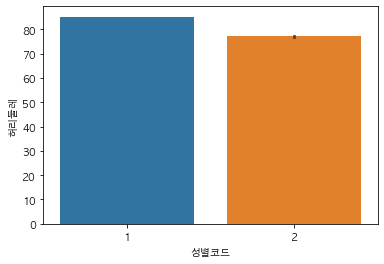

In [50]:
sns.barplot(data = hypo1, x = '성별코드', y = '허리둘레')
#성별코드에 따라 허리둘레의 차이가 있는 것은 확인할 수 있었음. 

# Conclusion
### 이번주는 시간이 조금 있어서 데이터를 많이 다룰 수 있었음. 하지만 흡연여부와 충치의 상관관계 등 다시 공부할 필요성을 느낌.
### 벌써 마지막 주가 되었지만, 마지막 주는 원하는 만큼 데이터를 다루고자 함. 
### 이번 코칭스터디가 끝나더라도 치팅시트와 강의를 복습하면서 깃헙에 올려두도록! 


# 안 예쁜 Matplotlib

In [ ]:
#점이 주근깨이고 글자가 잘 안보일떄
sns.set_context('talk') #구성 요소 배율 설정 등을 할 수 있음. 
sns.set_contest('Set2') #배색 변경
sns.set_style('whitegrid') #눈금 배경, 격자 설정 
# 코드 시작 처음에 설정 해놓고 하면 됨. 
# plt.scatter(x,y, alpha = 0.5)로 더 이쁘게 할 수 있음
# matplotlib도 style이 있음. 
